<a href="https://colab.research.google.com/github/skadiddles/CCMACLRL_EXERCISES_COM232_/blob/main/Midterms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

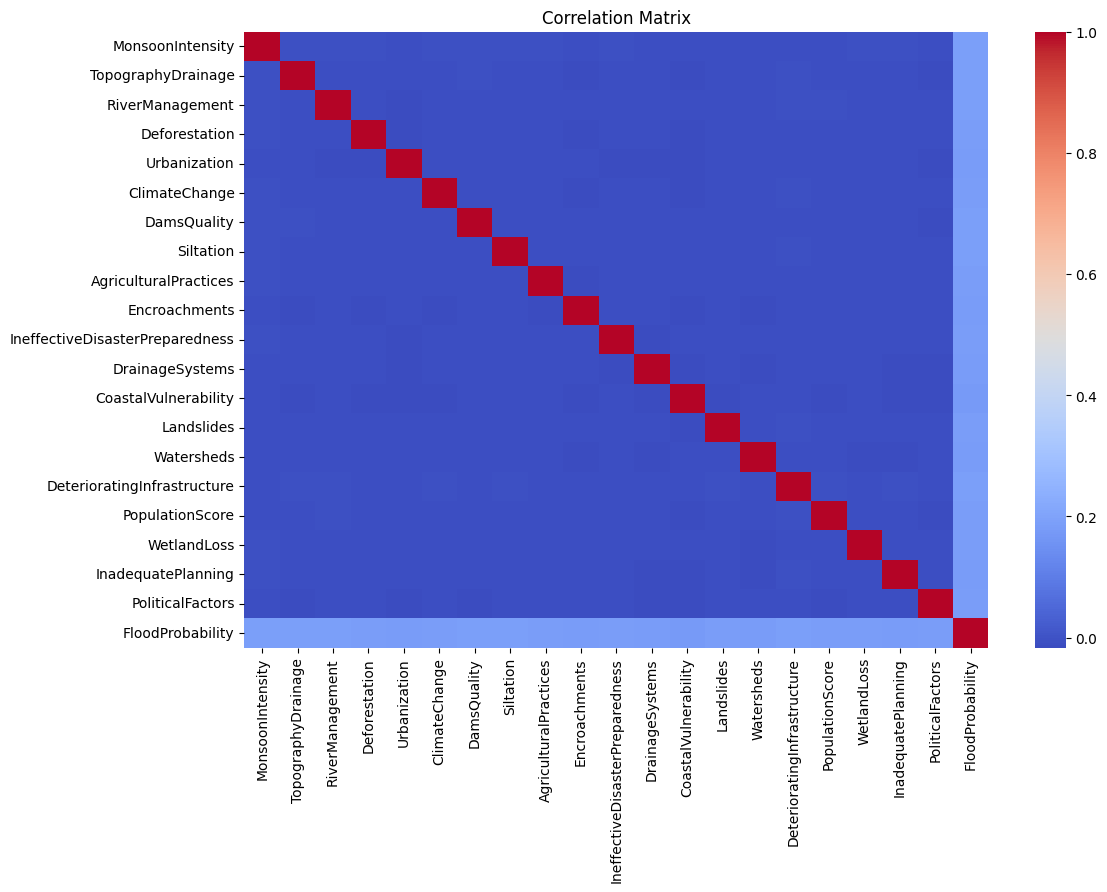

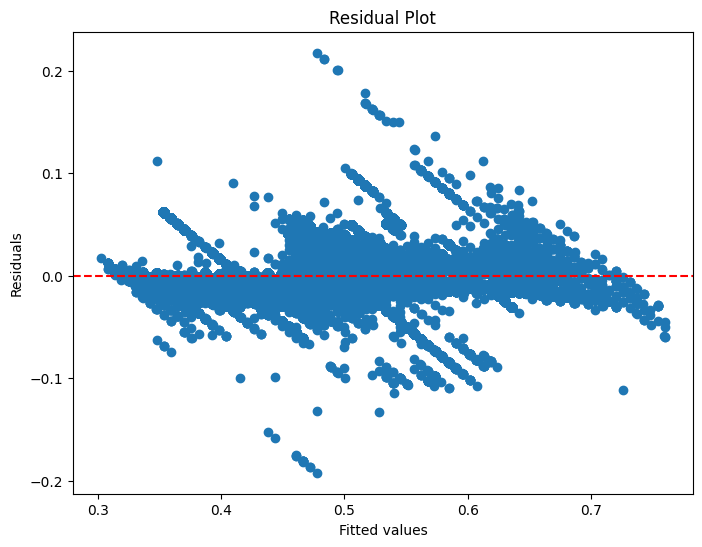

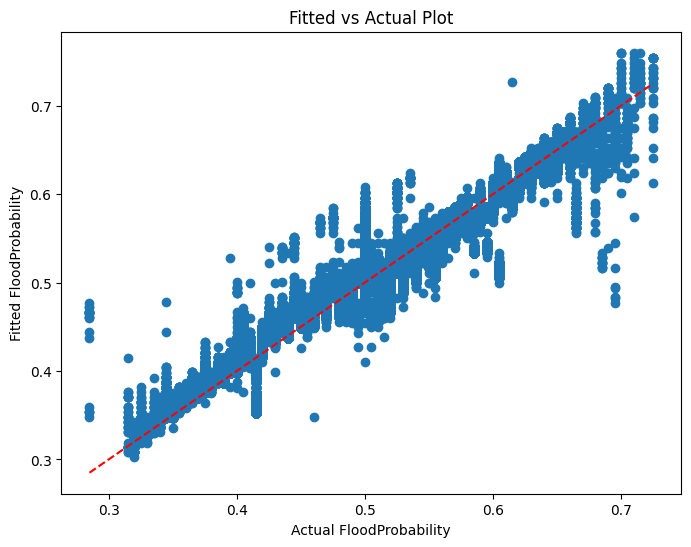

R² on training data: 0.8449501050792336
Submission file created: submission_file.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

#Training Data
train_url = "https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/train.csv?raw=true"
train_data = pd.read_csv(train_url)

X_train = train_data.drop(columns=["id", "FloodProbability"])
y_train = train_data["FloodProbability"]

#Load Test Data
test_url = "https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/test.csv?raw=true"
test_data = pd.read_csv(test_url)

#Diagnostics

plt.figure(figsize=(12, 8))
corr = train_data.drop(columns=["id"]).corr()
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Matrix")
plt.show()

y_train_pred = model.predict(X_train)
residuals = y_train - y_train_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_train_pred, residuals)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred)
plt.plot([y_train.min(), y_train.max()],
         [y_train.min(), y_train.max()],
         color="red", linestyle="--")
plt.xlabel("Actual FloodProbability")
plt.ylabel("Fitted FloodProbability")
plt.title("Fitted vs Actual Plot")
plt.show()

#Train Model
model = LinearRegression()
model.fit(X_train, y_train)

r2 = model.score(X_train, y_train)
print("R² on training data:", r2)

ids = test_data["id"]
X_test = test_data.drop(columns=["id"])

#Predict on Test Data
y_pred_test = model.predict(X_test)

submission = pd.DataFrame({
    "id": ids,
    "FloodProbability": y_pred_test
})

submission.to_csv("submission_file.csv", index=False)
print("Submission file created: submission_file.csv")
